In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import cifar

plt.style.use('fivethirtyeight')

In [2]:
images, labels, label_names = cifar.load_dataset()

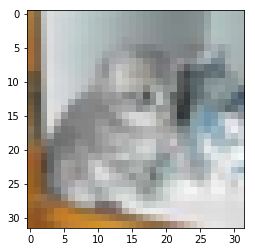

In [3]:
sample_cat = images[labels == 3][5]
plt.imshow(sample_cat)

In [4]:
from cnn import CNN
cifar_cnn = CNN(image_size=32, image_channels=3, batch_size=64, learning_rate=0.0005,
              batch_norm=True, conv_layers=[(6, 3), (18, 3), (32, 3)], fc_units=200)

In [17]:
cifar_cnn.train(images, labels, max_epochs=600, log_period=50)

Epoch #0/600 : loss = 5.3124
Epoch #50/600 : loss = 2.5130
Epoch #100/600 : loss = 2.9704
Epoch #150/600 : loss = 3.1044
Epoch #200/600 : loss = 2.8633
Epoch #250/600 : loss = 2.9929
Epoch #300/600 : loss = 2.1956
Epoch #350/600 : loss = 2.7879
Epoch #400/600 : loss = 3.2123
Epoch #450/600 : loss = 2.8120
Epoch #500/600 : loss = 2.3467
Epoch #550/600 : loss = 2.4983


(array([  0.,  46.,   1.,   2.,   1.,   0.,   6.,   3.,   5.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

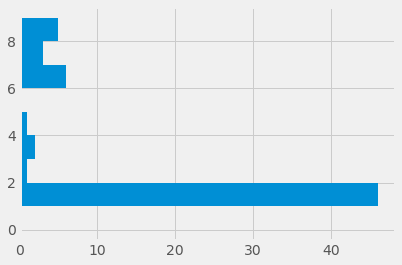

In [27]:
import matplotlib.pyplot as plt
plt.hist(cifar_cnn.session.run(cifar_cnn.predictions, feed_dict={cifar_cnn.image_batch: images[labels == 1][:64]}), bins=range(10), orientation='horizontal')